In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv("performancefinal.csv")
data.head()

,PID,Links,QT1NODE,QT1TimeNODE,QT1TScoreNODE,QT2NODE,QT2TimeAdjNODE,QT2BestNODE,QT2SecondBestNODE,QT2GoodNODE,...,QS1SPHERE,QS2SPHERE,QS3SPHERE,QS4SPHERE,QS5SPHERE,QS6SPHERE,QS7SPHERE,QS8SPHERE,QS9SPHERE,QS10SPHERE
0,2,No,Marvel,00:37.7,1,Captain America: the First Avenger 2011,01:50.5,0,1,1,...,5,2,6,4,1,6,5,5,6,7
1,3,Yes,Marvel,03:59.3,1,Avengers: Age of Ultron 2015,01:08.8,1,1,1,...,5,4,6,5,2,6,6,5,5,4
2,4,No,DC,12:04.3,0,X-Men: Age of Apocalypse 2016,08:14.6,0,0,0,...,5,1,5,5,1,5,5,5,6,6
3,5,Yes,Marvel,00:11.1,1,Fantastic Four: Rise of the Silver Surfer 2007,00:36.7,0,0,1,...,3,2,4,4,3,3,4,5,4,2
4,6,No,DC,03:35.3,0,Avengers 2012,03:27.7,0,0,1,...,2,5,6,6,2,6,5,4,4,5


In [4]:
a = data["QT1TScoreNODE"]
b = data["QT1TScoreSPHERE"]

In [5]:
np.unique(a, return_counts=True)

(array([0, 1]), array([ 8, 32]))

Shows the total number of correct answers for question 1 in the Node visualization.

In [6]:
np.unique(b, return_counts=True)

(array([0, 1]), array([ 1, 39]))

# Question/Task 1

Shows the total number of correct answers for question 1 in the Node visualization.

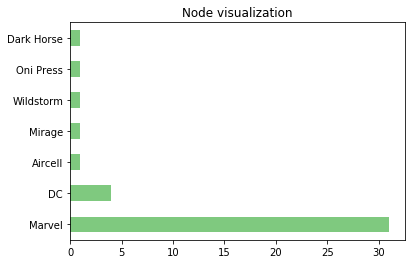

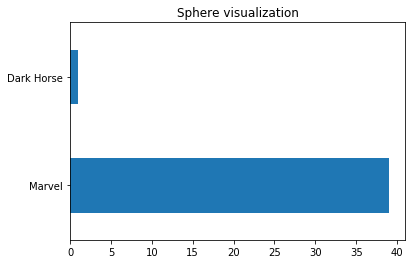

In [7]:
hist1 = data['QT1NODE'].value_counts().plot(kind='barh', colormap = "Accent", title = "Node visualization")
plt.show()
hist2 = data['QT1SPHERE'].value_counts().plot(kind='barh', title = "Sphere visualization")
plt.show()

The most common answer in the Node visualization is Marvel and we can see that there are many other options as well. DC being the second most selected. Whereas in the Sphere visualization, there are only two options that the participants selected, actually, only one participant chose Dark Horse, rest everyone selected the correct answer Marvel.

In [46]:
df = pd.DataFrame(data)
df.head()

,PID,Links,QT1NODE,QT1TimeNODE,QT1TScoreNODE,QT2NODE,QT2TimeAdjNODE,QT2BestNODE,QT2SecondBestNODE,QT2GoodNODE,...,QS1SPHERE,QS2SPHERE,QS3SPHERE,QS4SPHERE,QS5SPHERE,QS6SPHERE,QS7SPHERE,QS8SPHERE,QS9SPHERE,QS10SPHERE
0,2,No,Marvel,00:37.7,1,Captain America: the First Avenger 2011,01:50.5,0,1,1,...,5,2,6,4,1,6,5,5,6,7
1,3,Yes,Marvel,03:59.3,1,Avengers: Age of Ultron 2015,01:08.8,1,1,1,...,5,4,6,5,2,6,6,5,5,4
2,4,No,DC,12:04.3,0,X-Men: Age of Apocalypse 2016,08:14.6,0,0,0,...,5,1,5,5,1,5,5,5,6,6
3,5,Yes,Marvel,00:11.1,1,Fantastic Four: Rise of the Silver Surfer 2007,00:36.7,0,0,1,...,3,2,4,4,3,3,4,5,4,2
4,6,No,DC,03:35.3,0,Avengers 2012,03:27.7,0,0,1,...,2,5,6,6,2,6,5,4,4,5


In [9]:
linkOn = df["Links"] == "Yes"

In [10]:
correctAnsNode = df["QT1TScoreNODE"] == 1

In [11]:
linkOff = df["Links"] == "No"

In [12]:
wrongAnsNode = df["QT1TScoreNODE"] == 0

In [22]:
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 14,
 'linksOff and wrong answer': 6,
 'linksOn and right answer': 18,
 'linksOn and wrong answer': 2}

Now to see was having links beneficial or not for each of the visualization, we see that 18 participants got the right answer with the links on and 14 with the links off. Which means, 90% accuracy with links on compared to the 70% without links.

In [45]:
correctAnsNode = df["QT1TScoreSPHERE"] == 1
wrongAnsNode = df["QT1TScoreSPHERE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 20,
 'linksOff and wrong answer': 0,
 'linksOn and right answer': 19,
 'linksOn and wrong answer': 1}

# Question/Task 2

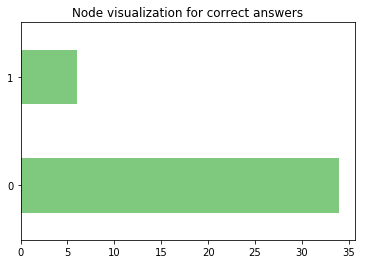

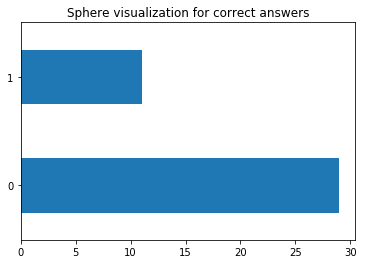

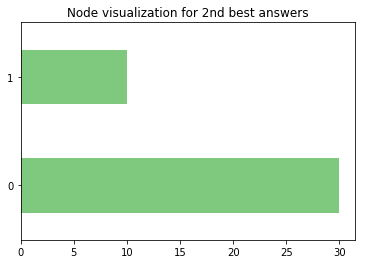

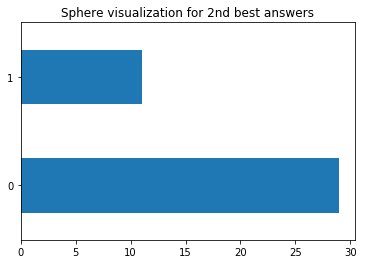

In [15]:
hist1 = data['QT2BestNODE'].value_counts().plot(kind='barh', colormap = "Accent", title = "Node visualization for correct answers")
plt.show()
hist2 = data['QT2BestSPHERE'].value_counts().plot(kind='barh', title = "Sphere visualization for correct answers")
plt.show()
hist3 = data['QT2SecondBestNODE'].value_counts().plot(kind='barh', colormap = "Accent", title = "Node visualization for 2nd best answers")
plt.show()
hist4 = data['QT2SecondBestSPHERE'].value_counts().plot(kind='barh', title = "Sphere visualization for 2nd best answers")
plt.show()

As we can see from the graphs above, the Node visualization produced more right answers and also the most number of second best answers.

In [32]:
correctAnsNode = df["QT2SecondBestNODE"] == 1
wrongAnsNode = df["QT2SecondBestNODE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 5,
 'linksOff and wrong answer': 15,
 'linksOn and right answer': 5,
 'linksOn and wrong answer': 15}

In [44]:
correctAnsNode = df["QT2SecondBestSPHERE"] == 1
wrongAnsNode = df["QT2SecondBestSPHERE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 7,
 'linksOff and wrong answer': 13,
 'linksOn and right answer': 4,
 'linksOn and wrong answer': 16}

# Question/Task 3

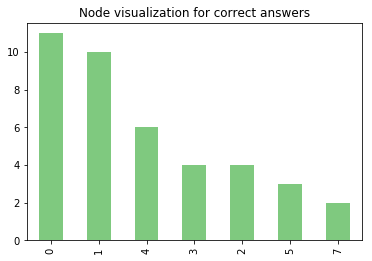

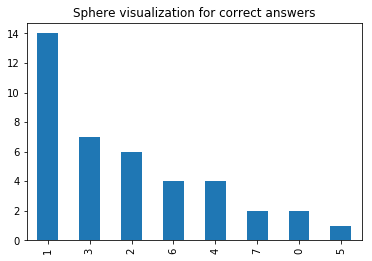

In [33]:
hist1 = data['QT3CorrectNODE'].value_counts().plot(kind='bar', colormap = "Accent", title = "Node visualization for correct answers")
plt.show()
hist2 = data['QT3CorrectSPHERE'].value_counts().plot(kind='bar', title = "Sphere visualization for correct answers")
plt.show()

In the Sphere visualization, most people got at least 1 right answer, whereas, in the Node visualization, most of the people got no right answers. There were more people in the Sphere visualization who got all 7 right answers.

In [34]:
correctAnsNode = df["QT3CorrectNODE"] >= 1
wrongAnsNode = df["QT3CorrectNODE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 15,
 'linksOff and wrong answer': 5,
 'linksOn and right answer': 14,
 'linksOn and wrong answer': 6}

In [43]:
correctAnsNode = df["QT3CorrectSPHERE"] >= 1
wrongAnsNode = df["QT3CorrectSPHERE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 20,
 'linksOff and wrong answer': 0,
 'linksOn and right answer': 18,
 'linksOn and wrong answer': 2}

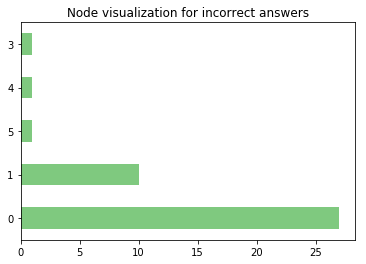

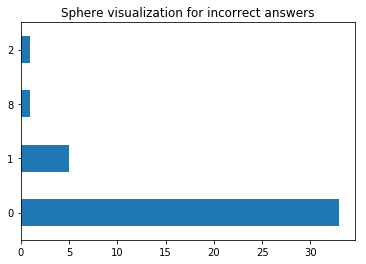

In [35]:
hist1 = data['QT3ErrorsNODE'].value_counts().plot(kind='barh', colormap = "Accent", title = "Node visualization for incorrect answers")
plt.show()
hist2 = data['QT3ErrorsSPHERE'].value_counts().plot(kind='barh', title = "Sphere visualization for incorrect answers")
plt.show()

In this case, we see that there were few errors or movies selected that were not part of the correct answer list. More people got at least 1 wrong answer in the Node visualization. There is also an entry in the Sphere visualization with 8 incorrect answers, which we can clearly see is an outlier. There were also more correct movie selection in the Sphere visualization. 

In [36]:
correctAnsNode = df["QT3ErrorsNODE"] >= 1
wrongAnsNode = df["QT3ErrorsNODE"] == 0
z = {'linksOff and no errors': df[linkOff & wrongAnsNode].count()[0], 'linksOff and # of errors': df[linkOff & correctAnsNode].count()[0], 'linksOn and no errors': df[linkOn & wrongAnsNode].count()[0], 'linksOn # of errors': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and # of errors': 5,
 'linksOff and no errors': 15,
 'linksOn # of errors': 8,
 'linksOn and no errors': 12}

In [42]:
correctAnsNode = df["QT3ErrorsSPHERE"] >= 1
wrongAnsNode = df["QT3ErrorsSPHERE"] == 0
z = {'linksOff and no errors': df[linkOff & wrongAnsNode].count()[0], 'linksOff and # of errors': df[linkOff & correctAnsNode].count()[0], 'linksOn and no errors': df[linkOn & wrongAnsNode].count()[0], 'linksOn # of errors': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and # of errors': 3,
 'linksOff and no errors': 17,
 'linksOn # of errors': 4,
 'linksOn and no errors': 16}

# Question/Task 4

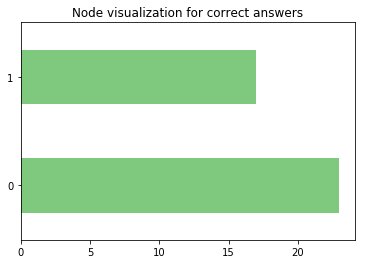

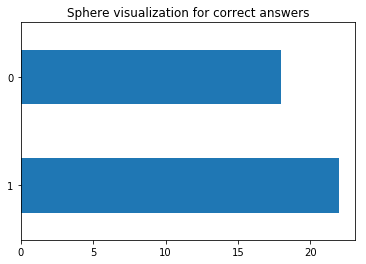

In [38]:
hist1 = data['QT4GoodNODE'].value_counts().plot(kind='barh', colormap = "Accent", title = "Node visualization for correct answers")
plt.show()
hist2 = data['QT4GoodSPHERE'].value_counts().plot(kind='barh', title = "Sphere visualization for correct answers")
plt.show()

In [39]:
correctAnsNode = df["QT4GoodNODE"] == 1
wrongAnsNode = df["QT4GoodNODE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 10,
 'linksOff and wrong answer': 10,
 'linksOn and right answer': 7,
 'linksOn and wrong answer': 13}

In [41]:
correctAnsNode = df["QT4GoodSPHERE"] == 1
wrongAnsNode = df["QT4GoodSPHERE"] == 0
z = {'linksOff and wrong answer': df[linkOff & wrongAnsNode].count()[0], 'linksOff and right answer': df[linkOff & correctAnsNode].count()[0], 'linksOn and wrong answer': df[linkOn & wrongAnsNode].count()[0], 'linksOn and right answer': df[linkOn & correctAnsNode].count()[0]}
z

{'linksOff and right answer': 11,
 'linksOff and wrong answer': 9,
 'linksOn and right answer': 11,
 'linksOn and wrong answer': 9}

# Hypotheses 
H1. There is a difference between the Graph conditions (Ring, Node) e.g., We expect the Ring condition to do better than the Node condition in most cases

H2. There is a difference between the Link conditions (Links, No Links) e.g., We expect the Links condition to do better than the No Links condition in most cases

H3. There are interactions between the Graph and Link conditions (Ring-Links, Ring-No Links, Node-Links, Node-No Links) e.g., We expect that the Ring Links condition will do better than the Ring No Links condition, and the Node Links condition might do better than the Ring No Links condition.

# Uniformity and Normality Q1

In [18]:
#check for uniformity
from scipy import stats
stats.kstest(df["QT1TScoreNODE"], stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.80000000000000004, pvalue=0.0)

In [19]:
#check for normality
stats.kstest(df["QT1TScoreNODE"], 'norm')

KstestResult(statistic=0.64134474606854286, pvalue=2.2204460492503131e-16)

In [20]:
#check for uniformity
stats.kstest(df["QT1TScoreSPHERE"], stats.uniform(loc=0.0, scale=1.0).cdf)

KstestResult(statistic=0.97499999999999998, pvalue=0.0)

In [21]:
#check for normality
stats.kstest(df["QT1TScoreSPHERE"], 'norm')

KstestResult(statistic=0.8163447460685429, pvalue=0.0)